# Exploring Events data

### Importing necessary libraries

In [1]:
pip install pandas matplotlib seaborn


  Using cached pandas-1.5.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
  Using cached matplotlib-3.6.0-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.4 MB)
  Using cached seaborn-0.12.0-py3-none-any.whl (285 kB)
  Using cached numpy-1.23.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Using cached pytz-2022.2.1-py2.py3-none-any.whl (500 kB)
  Using cached kiwisolver-1.4.4-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
  Using cached fonttools-4.37.3-py3-none-any.whl (959 kB)
  Using cached Pillow-9.2.0-cp38-cp38-manylinux_2_28_x86_64.whl (3.2 MB)
  Using cached contourpy-1.0.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (295 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Loading the data

In [27]:
events = pd.read_csv('../sources/events.csv')
registered = pd.read_csv('../sources/registered_in_events.csv')
forms = pd.read_csv('../sources/clean_new.csv')

### Exploring

In [4]:
events.shape

(177, 31)

In [5]:
registered.shape

(4888, 8)

In [6]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           177 non-null    int64  
 1   description                  175 non-null    object 
 2   title                        177 non-null    object 
 3   lang                         71 non-null     object 
 4   url                          177 non-null    object 
 5   banner                       174 non-null    object 
 6   capacity                     177 non-null    int64  
 7   starting_at                  177 non-null    object 
 8   ending_at                    177 non-null    object 
 9   status                       177 non-null    object 
 10  created_at                   177 non-null    object 
 11  updated_at                   177 non-null    object 
 12  author_id                    0 non-null      float64
 13  event_type_id       

In [7]:
registered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           4888 non-null   int64  
 1   email        4888 non-null   object 
 2   created_at   4888 non-null   object 
 3   updated_at   4888 non-null   object 
 4   attendee_id  1058 non-null   float64
 5   event_id     4888 non-null   int64  
 6   status       4888 non-null   object 
 7   attended_at  0 non-null      float64
dtypes: float64(2), int64(2), object(4)
memory usage: 305.6+ KB


In [8]:
events.sort_values(['created_at']).head(3)

,id,description,title,lang,url,banner,capacity,starting_at,ending_at,status,...,eventbrite_url,organization_id,published_at,eventbrite_sync_description,eventbrite_sync_status,online_event,sync_with_eventbrite,currency,slug,tags
1,35,¡Ven y crea el producto que enamore al cliente!,Crea un producto que enamore,NaN,https://www.eventbrite.com/e/crea-un-producto-...,https://img.evbuc.com/https%3A%2F%2Fcdn.evbuc....,100,2020-10-14 16:30:00+00:00,2020-10-14 17:30:00+00:00,ACTIVE,...,https://www.eventbrite.com/e/crea-un-producto-...,4,2020-09-23 18:55:47+00:00,2020-10-14 07:30:36.116768+00:00,PERSISTED,True,False,USD,NaN,NaN
2,36,¡Lo han logrado! Nuestros estudiantes presenta...,GeekTALKS: Presentación de proyectos finales,NaN,https://www.eventbrite.com/e/geektalks-present...,https://img.evbuc.com/https%3A%2F%2Fcdn.evbuc....,200,2020-10-16 19:00:00+00:00,2020-10-16 21:00:00+00:00,ACTIVE,...,https://www.eventbrite.com/e/geektalks-present...,4,2020-09-22 18:36:58+00:00,2020-10-16 07:30:52.632913+00:00,PERSISTED,True,False,USD,NaN,NaN
9,37,Preséntale al mundo un currrículum que logre u...,Cómo crear tu currículum con HTML y CSS,NaN,https://www.eventbrite.com/e/como-crear-tu-cur...,https://img.evbuc.com/https%3A%2F%2Fcdn.evbuc....,200,2020-10-22 19:00:00+00:00,2020-10-22 20:00:00+00:00,ACTIVE,...,https://www.eventbrite.com/e/como-crear-tu-cur...,4,2020-10-07 22:12:40+00:00,2020-10-22 07:30:34.764812+00:00,PERSISTED,True,False,USD,NaN,NaN


We can see that the 'tags' column has started to be filled since April 2022.

In [9]:
#Let's create 2 functions to check the categories in categorical features

def countplot_features(df, feature):
    fig = plt.figure(figsize=(10,6))
    ax = sns.countplot(x=df[feature], order=df[feature].value_counts(ascending=False).index);

    abs_values = df[feature].value_counts(ascending=False).values
    ax.bar_label(container=ax.containers[0], labels=abs_values)
    plt.xticks(rotation=30, ha='right')
    #plt.show()

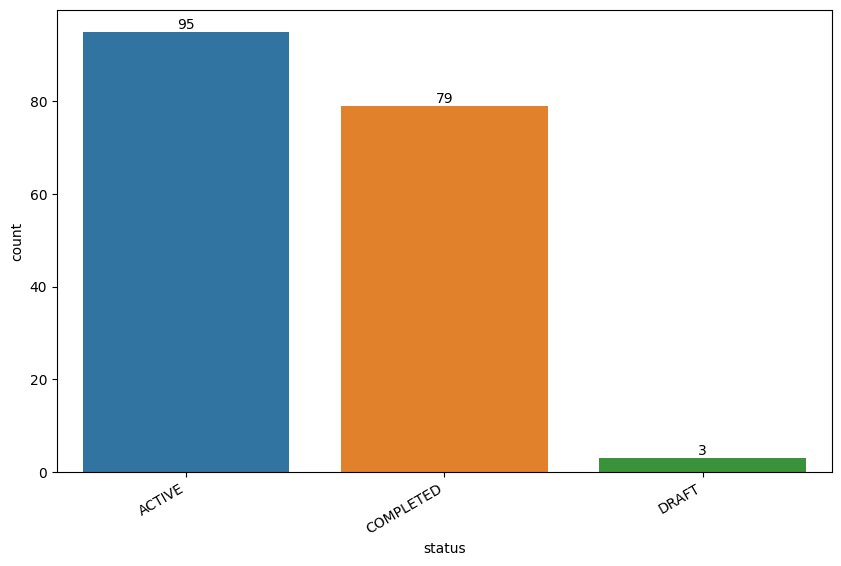

In [10]:
countplot_features(events,'status')

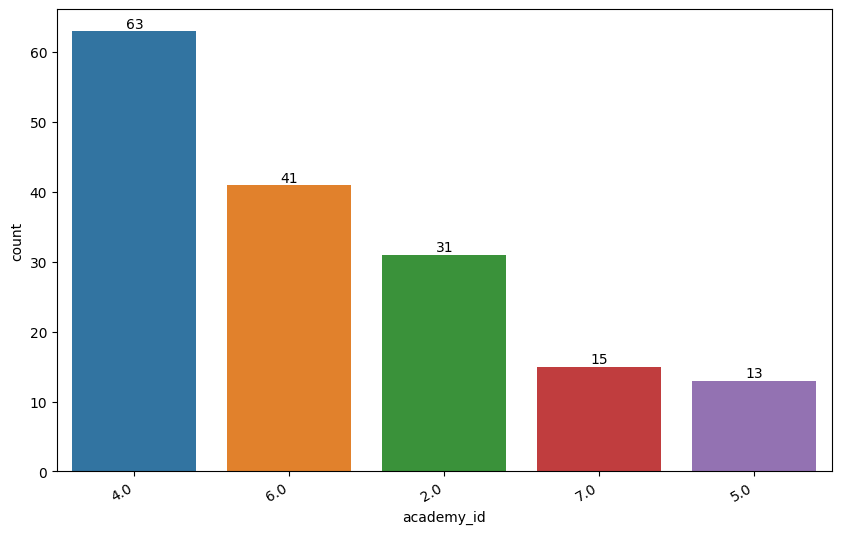

In [11]:
countplot_features(events,'academy_id')

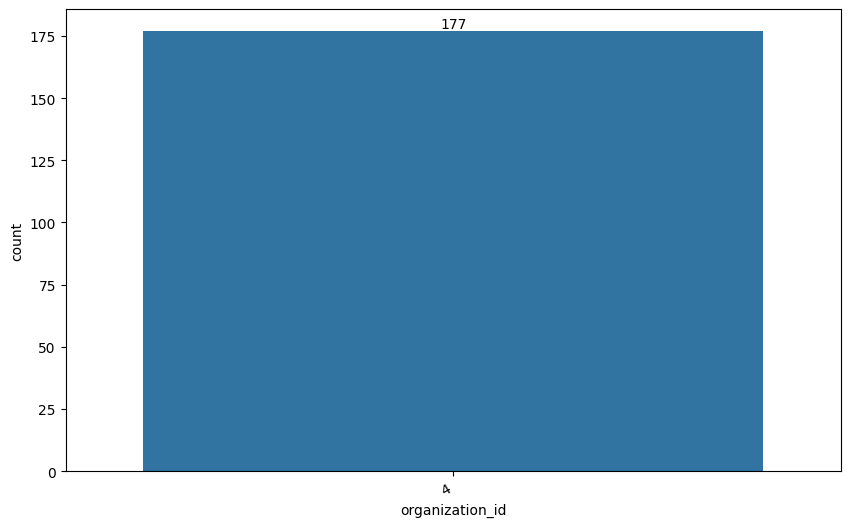

In [12]:
countplot_features(events,'organization_id')

**Dropping columns**

In [13]:
#Useless columns

TO_DROP_EVENTS = ['created_at','updated_at','organization_id']

TO_DROP_REGISTERED = ['id', 'created_at','updated_at','status']

#Drop useless columns in registered_in_events

registered.drop(TO_DROP_REGISTERED, axis=1, inplace=True)

In [14]:
#Drop useless columns in events

events.drop(TO_DROP_EVENTS, axis=1, inplace=True)

In [15]:
#Drop null columns in events
events.dropna(axis=1, how='all', inplace=True)

In [16]:
#Drop null columns in registered
registered.dropna(axis=1, how='all', inplace=True)

In [17]:
#Drop rows with test emails used for registration
registered = registered[registered["email"].str.contains("@4geeks") == False]

In [18]:
registered.shape

(4870, 3)

In [19]:
events.shape

(177, 25)

**Verifying amount of duplicates**

In [20]:
#See how many duplicated events
pd.options.display.max_rows = None
events['id'].duplicated().value_counts()

False    177
Name: id, dtype: int64

In [21]:
#See how many duplicated emails in registered people
pd.options.display.max_rows = None
registered['email'].duplicated().value_counts()

False    3741
True     1129
Name: email, dtype: int64

There are no duplicated events and there are 1129 duplicated emails in registered people, so they have gone to several events. Should NOT be eliminated. 

**Join datasets**

In [22]:
inner_merged = pd.merge(registered, events, left_on="event_id", right_on="id").drop('id', axis=1)
inner_merged.shape

(4870, 27)

**1. Events with more and less attendies and what tags do they have**

In [23]:
inner_merged.groupby(['event_id','title']).agg({'email': 'count'}).sort_values(by='email',ascending=False).head(20)

,,email
event_id,title,
142,GeekCON 2021,439
187,Cloud Rocket Summit,174
413,Codifica tu camino hacia el extranjero,112
430,Intro to Coding: Descubre cómo potenciar tu carrera como programador,110
213,Workshop: Python para principiantes,107
258,Introduction to Javascript Workshop,93
412,Intro to Coding: Descubre cómo potenciar tu carrera como programador,82
364,Cuáles son tus oportunidades como Developer y cómo lograrlas,79
423,Masterclass: React JS vs Vue JS,75


In [24]:
#top 20 events with less attendies
inner_merged.groupby(['event_id','title']).agg({'email': 'count'}).sort_values(by='email',ascending=True).head(20)

,,email
event_id,title,
483,Python for future Data Scientist,1
350,Making Education Possible: Why Good Education is a Matter of Money,1
207,Tech Hub Hackaton,1
217,Un Desafío Navideño de 4Geeks,1
259,AI and ML in the Enterprise,1
368,4Geeks GeekTalks - Meet our Web-dev Students showing their final projects!,1
474,Presentación de Proyectos Geniales en Machine Learning,2
482,GeekTALKS - Demo de Proyectos Finales,2
417,Nuestros chicos presentan su proyecto final ¿Quieres verlo?,3


**2. Tags with more attendies**

In [25]:
inner_merged.groupby(['tags']).agg({'email': 'count'}).sort_values(by='email',ascending=False).head(20)

,email
tags,
"career-support-attendee,fs-event-attendee",312
"fs-event-attendee,openhouse-attendee",283
"fs-event-attendee,career-support-attendee",198
"fs-event-attendee,tech-javascript",165
"geektalk-attendee,fs-event-attendee",147
"openhouse-attendee,fs-event-attendee",127
"fs-event-attendee,geektalk-attendee",88
"tech-nodejs,tech-object-oriented-programing",75
"tech-python,tech-datascience",72


**3. Academy with more attendies, what events and what tags**

In [26]:
inner_merged.groupby(['academy_id','title','tags']).agg({'email': 'count'}).sort_values(by='email', ascending = False).head(20)

,,,email
academy_id,title,tags,
2.0,Intro to Coding: Descubre cómo potenciar tu carrera como programador,"fs-event-attendee,openhouse-attendee",192
5.0,Codifica tu camino hacia el extranjero,"career-support-attendee,fs-event-attendee",112
4.0,Introduction to Javascript Workshop,"fs-event-attendee,tech-javascript",93
2.0,Cuáles son tus oportunidades como Developer y cómo lograrlas,"fs-event-attendee,career-support-attendee",79
5.0,Masterclass: React JS vs Vue JS,"tech-nodejs,tech-object-oriented-programing",75
2.0,Intro to Coding: Descubre cómo potenciar tu carrera como programador,"fs-event-attendee,tech-javascript",72
6.0,Intro a Python,"tech-python,tech-datascience",72
2.0,Cómo optimizar tu perfil de LinkedIn para impulsar tu carrera,"career-support-attendee,fs-event-attendee",71
5.0,¿Cómo saber si programar es lo mío?,"newsletter,tech-object-oriented-programing,fs-event-attendee",69


**4. Where do attendies come from, by tag and academy_id.**

It's not possible to know where do attendies come from, unless they ended up buying the course.

**5. How many attendies that are not SOFT or HARD**

In [29]:
final_df = pd.merge(inner_merged, forms[['email','lead_type', 'country','deal_status','won_at']],on='email', how='left')
final_df.shape

(4870, 31)

In [ ]:
final_df.loc[(final_df['lead_type'] != 'SOFT') & (final_df['lead_type'] != 'STRONG')].head(5)

**6. Events with attendies that bought after the event (won_at date is after the event date)**

In [35]:

final_df.loc[(final_df['won_at'] > final_df['ending_at'])]


,email,attendee_id,event_id,description,title,lang,url,banner,capacity,starting_at,...,eventbrite_sync_status,online_event,sync_with_eventbrite,currency,slug,tags,lead_type,country,deal_status,won_at
9,heinerborle@gmail.com,NaN,121,Acompaña a nuestro profesor Jhony Grillet este...,Crea tu página web con JAMstack,NaN,https://www.eventbrite.com/e/crea-tu-pagina-we...,https://img.evbuc.com/https%3A%2F%2Fcdn.evbuc....,100,2021-01-28 19:00:00+00:00,...,PERSISTED,True,False,USD,NaN,NaN,SOFT,Costa Rica,WON,2022-03-07 20:16:52
33,salazarandradejesus@gmail.com,NaN,122,¡Llegó el momento de que conozcas todas las ha...,GeekTALKS: Presentación de proyectos finales,NaN,https://www.eventbrite.com/e/geektalks-present...,https://img.evbuc.com/https%3A%2F%2Fcdn.evbuc....,100,2021-02-26 20:00:00+00:00,...,PERSISTED,True,False,USD,NaN,NaN,SOFT,Venezuela,WON,2022-08-24 14:46:11
40,eddicsonh@gmail.com,NaN,122,¡Llegó el momento de que conozcas todas las ha...,GeekTALKS: Presentación de proyectos finales,NaN,https://www.eventbrite.com/e/geektalks-present...,https://img.evbuc.com/https%3A%2F%2Fcdn.evbuc....,100,2021-02-26 20:00:00+00:00,...,PERSISTED,True,False,USD,NaN,NaN,STRONG,Venezuela,WON,2022-08-24 14:46:14
46,gsanchezquiroz@outlook.com,NaN,122,¡Llegó el momento de que conozcas todas las ha...,GeekTALKS: Presentación de proyectos finales,NaN,https://www.eventbrite.com/e/geektalks-present...,https://img.evbuc.com/https%3A%2F%2Fcdn.evbuc....,100,2021-02-26 20:00:00+00:00,...,PERSISTED,True,False,USD,NaN,NaN,SOFT,Venezuela,WON,2022-05-03 13:39:11
76,videzere@gmail.com,NaN,125,¡Conviértete en el próximo Desarrollador Full-...,Intro to Coding: Descubre los beneficios de ap...,NaN,https://www.eventbrite.com/e/intro-to-coding-d...,https://img.evbuc.com/https%3A%2F%2Fcdn.evbuc....,100,2021-02-19 19:00:00+00:00,...,PERSISTED,True,False,USD,NaN,NaN,STRONG,Venezuela,WON,2022-08-24 14:46:23
97,andreasgamardo@gmail.com,NaN,125,¡Conviértete en el próximo Desarrollador Full-...,Intro to Coding: Descubre los beneficios de ap...,NaN,https://www.eventbrite.com/e/intro-to-coding-d...,https://img.evbuc.com/https%3A%2F%2Fcdn.evbuc....,100,2021-02-19 19:00:00+00:00,...,PERSISTED,True,False,USD,NaN,NaN,STRONG,Remoto,WON,2022-08-24 14:46:25
114,eleanablandin@gmail.com,NaN,125,¡Conviértete en el próximo Desarrollador Full-...,Intro to Coding: Descubre los beneficios de ap...,NaN,https://www.eventbrite.com/e/intro-to-coding-d...,https://img.evbuc.com/https%3A%2F%2Fcdn.evbuc....,100,2021-02-19 19:00:00+00:00,...,PERSISTED,True,False,USD,NaN,NaN,SOFT,United States,WON,2022-08-24 14:47:18
118,theownerproject@gmail.com,1716.0,124,Which one is the best fit for you? Find out fr...,Software Engineering vs. Full-Stack Development,NaN,https://www.eventbrite.com/e/software-engineer...,https://img.evbuc.com/https%3A%2F%2Fcdn.evbuc....,100,2021-02-17 21:00:00+00:00,...,PERSISTED,True,False,USD,NaN,NaN,SOFT,United States,WON,2021-10-19 15:30:34
143,kevin.soria@outlook.com,948.0,124,Which one is the best fit for you? Find out fr...,Software Engineering vs. Full-Stack Development,NaN,https://www.eventbrite.com/e/software-engineer...,https://img.evbuc.com/https%3A%2F%2Fcdn.evbuc....,100,2021-02-17 21:00:00+00:00,...,PERSISTED,True,False,USD,NaN,NaN,SOFT,United States,WON,2022-05-24 14:34:36
200,jivazam@gmail.com,1595.0,126,Discover that learning to code will open the d...,Pitch Day. Meet new talent in Software Develop...,NaN,https://www.eventbrite.com/e/pitch-day-meet-ne...,https://img.evbuc.com/https%3A%2F%2Fcdn.evbuc....,100,2021-02-26 23:00:00+00:00,...,PERSISTED,True,False,USD,NaN,NaN,SOFT,United States,WON,2021-10-19 15:31:30
